# Decision Trees classification

### Hands-on example

In this hands-on example we will explore a multiclass classification problem.  
We will use a iris dataset to classify **3 classes** of irises using some real valued features.  

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from IPython.display import Image  

import matplotlib.pyplot as plt
import numpy as np
import pydotplus
import seaborn as sns

## Outline:
*    Iris dataset for Classification
*    Decision tree classification
*    Visualize the decision tree

### Iris Dataset:

<font size="3">
    
Multiclass classification problem with 3 labels:  {0,1,2}  representing 3 different iris species

Features - Sepal Length, Sepal Width, Petal Length and Petal Width \
Target - 3 types of irises’ 0 = Setosa, 1 = Versicolor, 2 = Virginica </font>



Downloading...
From: https://drive.google.com/uc?id=10aebj98Ctgv-H9MnPVmPtxwBryW3BgcZ
To: /content/iris_desc.png
100% 208k/208k [00:00<00:00, 59.3MB/s]


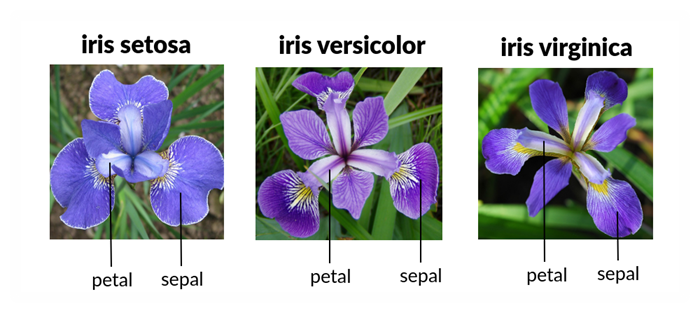

In [ ]:
!gdown --id 10aebj98Ctgv-H9MnPVmPtxwBryW3BgcZ
Image("iris_desc.png")

In [ ]:
# Load the iris dataset
iris = datasets.load_iris() 

# we only take the first two features so that we can visualize the feature space
# X: sepal length, sepal width
X = iris.data[:, :2] 
# Y: iris type
y = iris.target 

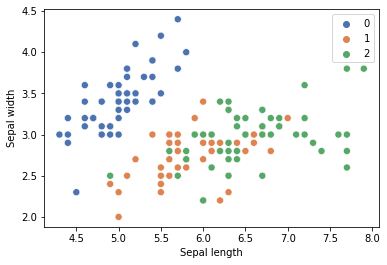

In [ ]:
sns.scatterplot(x = X[:,0], y = X[:,1], hue =y, s=50, palette="deep")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()

## Split the data into train/valid/test

In [ ]:
# Create training and test sets
# It is very important to shuffle data before performing the split
# The train and test sets should contain a good mix of all kinds of examples
# train_test_split() function shuffles data before splitting by default

# Split into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Split training data into training and validation data
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

## Decision Tree classifier

### Building the Decision Tree
Now, let us build a decision tree to classify the wine examples.
First we need to decide the what uncertainity measure to use. In this example we will use 'entropy'.

`DecisionTreeClassifier()` API of scikit-learn has built-in support for popular strategies: _entropy_ and _gini index_.  
Full API reference : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10)

In [ ]:
predictions = clf.predict(X_test)

In [ ]:
print ('accuracy = ' + str(accuracy_score(y_test, predictions)))

accuracy = 0.7333333333333333


## Visualize the tree

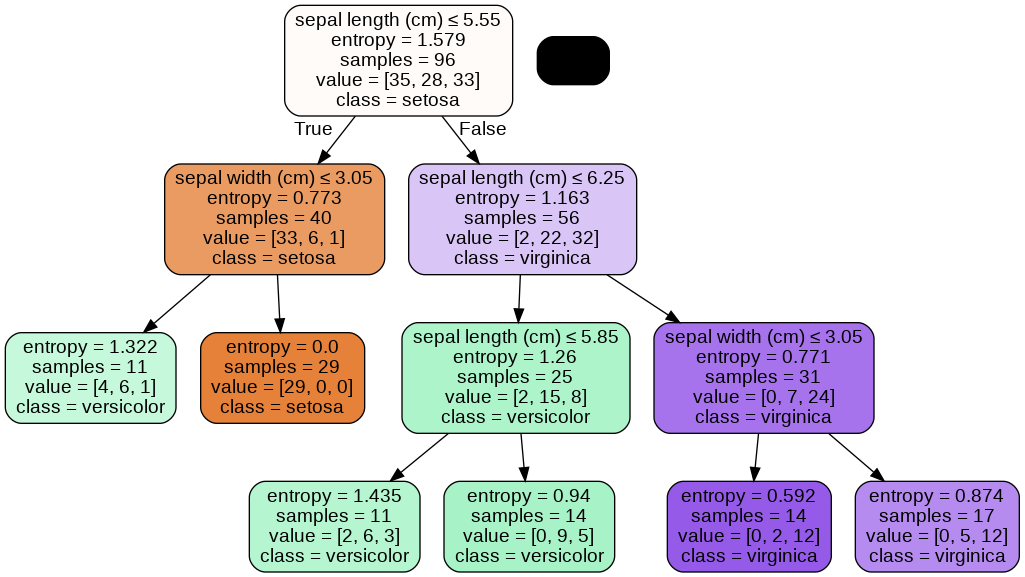

In [ ]:
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names[:2],  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

In [ ]:
print(tree.export_text(clf))
#feature_0: Sepal Length and feature_1: Sepal Width

|--- feature_0 <= 5.55
|   |--- feature_1 <= 3.05
|   |   |--- class: 1
|   |--- feature_1 >  3.05
|   |   |--- class: 0
|--- feature_0 >  5.55
|   |--- feature_0 <= 6.25
|   |   |--- feature_0 <= 5.85
|   |   |   |--- class: 1
|   |   |--- feature_0 >  5.85
|   |   |   |--- class: 1
|   |--- feature_0 >  6.25
|   |   |--- feature_1 <= 3.05
|   |   |   |--- class: 2
|   |   |--- feature_1 >  3.05
|   |   |   |--- class: 2



# Tuning Hyperparameters and Overfitting

In class we discussed _'pruning'_ to deal with overfitting.  

Here we will look at 3 simpler approaches:  
1. minimum samples leaf
2. minimum samples split
3. max depth


## minimum samples leaf
<font size="3">The **minimum number of samples required to be at a leaf node.** A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches.</font>

In [ ]:
for leaf_size in [20,10,5,2]:
    clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=leaf_size)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred = clf.predict(X_valid)
    print ('Training accuracy for min_samples_leaf ' + str(leaf_size) + ' = ' + 
       str(accuracy_score(y_train, y_pred_train)))
    print ('Validation accuracy for min_samples_leaf ' + str(leaf_size) + ' = ' + 
           str(accuracy_score(y_valid, y_pred)) + '\n')

Training accuracy for min_samples_leaf 20 = 0.75
Validation accuracy for min_samples_leaf 20 = 0.5833333333333334

Training accuracy for min_samples_leaf 10 = 0.7708333333333334
Validation accuracy for min_samples_leaf 10 = 0.6666666666666666

Training accuracy for min_samples_leaf 5 = 0.8020833333333334
Validation accuracy for min_samples_leaf 5 = 0.7083333333333334

Training accuracy for min_samples_leaf 2 = 0.8541666666666666
Validation accuracy for min_samples_leaf 2 = 0.6666666666666666



## minimum samples split
The **minimum number of samples required to split an internal node**

In [ ]:
for min_samples_split in [20,10,5,2]:
    clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred = clf.predict(X_valid)
    print ('Training accuracy for min_samples_split ' + str(min_samples_split) + ' = ' + 
       str(accuracy_score(y_train, y_pred_train)))
    print ('Validation accuracy for min_samples_split ' + str(min_samples_split) + ' = ' + 
           str(accuracy_score(y_valid, y_pred)) + '\n')

Training accuracy for min_samples_split 20 = 0.8541666666666666
Validation accuracy for min_samples_split 20 = 0.6666666666666666

Training accuracy for min_samples_split 10 = 0.8541666666666666
Validation accuracy for min_samples_split 10 = 0.6666666666666666

Training accuracy for min_samples_split 5 = 0.8958333333333334
Validation accuracy for min_samples_split 5 = 0.7083333333333334

Training accuracy for min_samples_split 2 = 0.9270833333333334
Validation accuracy for min_samples_split 2 = 0.6666666666666666



## max depth
<font size="3">The **maximum depth of the tree.**
If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.</font>

In [ ]:
for max_depth in [2,4,6,8]:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred = clf.predict(X_valid)
    print ('Training accuracy for max_depth ' + str(max_depth) + ' = '+ str(accuracy_score(y_train, y_pred_train)))
    print ('Validation accuracy for max_depth ' + str(max_depth) + ' = '+ str(accuracy_score(y_valid, y_pred))+'\n')

Training accuracy for max_depth 2 = 0.75
Validation accuracy for max_depth 2 = 0.625

Training accuracy for max_depth 4 = 0.84375
Validation accuracy for max_depth 4 = 0.7083333333333334

Training accuracy for max_depth 6 = 0.8645833333333334
Validation accuracy for max_depth 6 = 0.7083333333333334

Training accuracy for max_depth 8 = 0.8854166666666666
Validation accuracy for max_depth 8 = 0.7083333333333334



We do not have to use all of them. 
Depending on the task and the dataset, a couple of them could be enough.

## Test accuracy

In [ ]:
X_train = np.concatenate((X_train, X_valid))
y_train = np.concatenate((y_train, y_valid))

clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5, max_depth=8)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print ('Test accuracy = ' + str(accuracy_score(y_test, y_pred)))

Test accuracy = 0.7666666666666667
